# The Transformation and Accept/Reject (aka. Von Neumann) methods

Python notebook for illustrating how to generate random numbers following a specific PDF using uniformly distributed random numbers. Both the Accept-Reject (Von Neumann) and transformation methods are used.

### References:
- G. Cowan: Chapter 3
- P. R. Bevington: page 81-84
- __[40. Monte Carlo Techniques PDG](https://pdg.lbl.gov/2023/reviews/rpp2023-rev-monte-carlo-techniques.pdf)__

### Authors: 
- Troels C. Petersen (Niels Bohr Institute)

### Date:    
- 29-11-2024 (latest update)

***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit, cost
from scipy import stats
plt.rcParams['font.size'] = 18

Set the parameters of the program:

In [2]:
r = np.random
r.seed(42)

save_plots = False   
N_points = 10000      # Number of random points to be produced!

xmin = 0.0
xmax = 1.0
N_bins = 100

# Define f(x) = 2x, for x in [0,1]
def fx_2x(x) :
    # Normalization is N_points * binwidth:
    k = (xmax - xmin) / N_bins
    N = N_points * k
    return N * 2*x

### Problem: Produce - using the TRANSFORMATION METHOD - random points following $f(x) = 2x, x \in [0, 1]$.

To produce random numbers according to $f(x)$ we use the transformation method:

$F(x) = x^2$ and then $F^{-1}(r) = \sqrt{r}$, where $r$ is uniform numbers in $[0,1]$

**NOTE: Remember that you have to think about limits!**

In [3]:
x_transformation = np.sqrt(r.uniform(size=N_points))

And to make sure that we have computed the points correctly, we plot a histogram of the data:

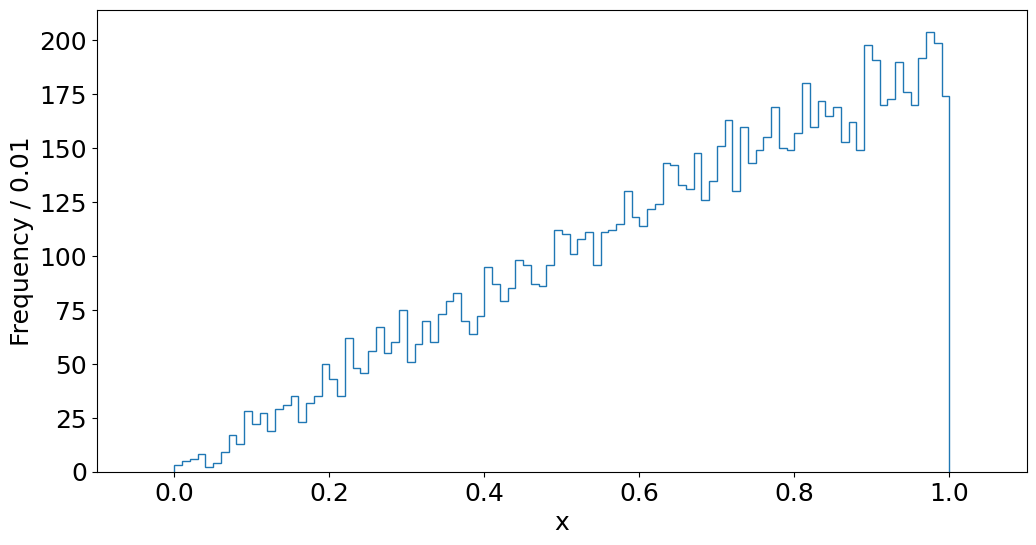

In [4]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(x_transformation, bins=N_bins, range=(xmin, xmax), histtype='step', label='histogram' )
ax.set(xlabel="x", ylabel="Frequency / 0.01", xlim=(xmin-0.1, xmax+0.1));

And plot $f(x)$ on top of the figure (notice, no fit here!) along with the legend, figure text and finally saves the figure:

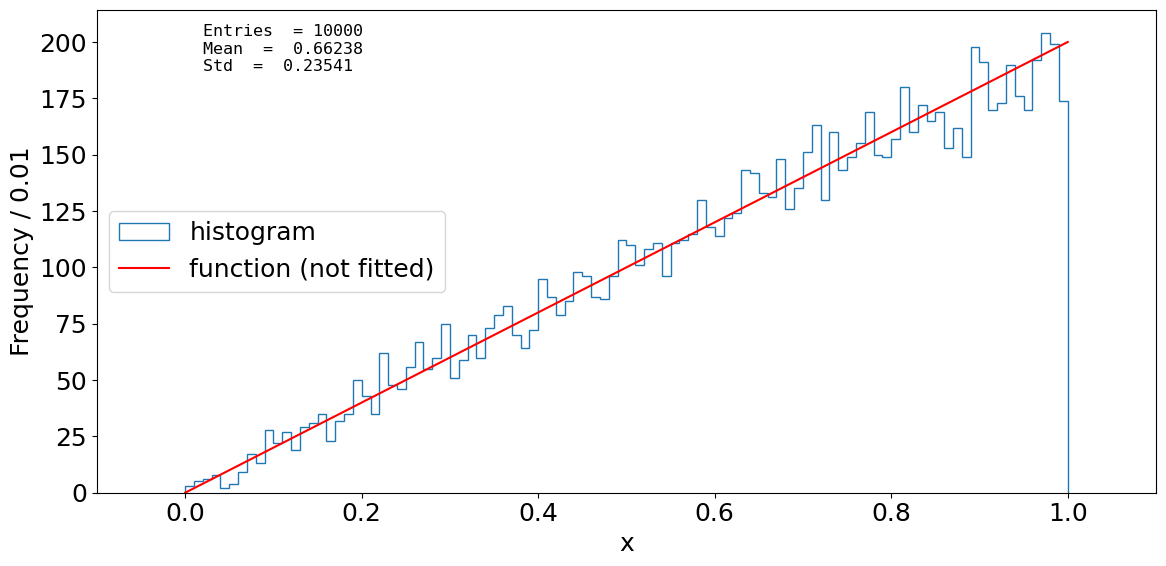

In [5]:
# Plot f(x)
x_axis1 = np.linspace(xmin, xmax, 1000)
y_axis1 = fx_2x(x_axis1)
ax.plot(x_axis1, y_axis1, 'r-', label='function (not fitted)')

# Define figure text
plot_info = ['Entries  = ' + f"{len(x_transformation)}",
     'Mean  =  ' + f"{x_transformation.mean():3.5f}",
     'Std  =  '+ f"{x_transformation.std(ddof=1):3.5f}",
]

# Plot figure text
ax.text(0.1, 0.97, "\n".join(plot_info), family='monospace', fontsize=12, verticalalignment='top',transform=ax.transAxes)

# Add legend
ax.legend(loc='best')
fig.tight_layout()

# Save figure
if save_plots: 
    fig.savefig("Hist_2x_TransformationMethod.pdf", dpi=600)

# Show the figure
fig

And we see how we have succesfully generated random numbers according to $f(x)$ via the transformation method. Notice that if this method, if applicable, is 100% effective! 

### Problem: Produce - using the ACCEPT/REJECT METHOD - random points following $f(x) = 2x, x \in [0, 1]$.

To produce random numbers according to $f(x)$ we now use the accept/reject method.
Since this is bounded by $[0,1] \times [0,2]$, this is the range we generate numbers in.

To simulate the data we repeat the process, until the wanted number of points have been generated. A bit annoyingly, there is no do-while loop in Python, which explains the "funny" while construction below.

In [6]:
N_try = 0
ymin = 0.0      # Minimum value the function will take!
ymax = 2.0      # Maximum value the function will take!
x_accepted = np.zeros(N_points)

for i in range(N_points):
    
    while True:
        
        # Count the number of tries, to get efficiency/integral
        N_try += 1                    
        
        # Range that f(x) is defined/wanted in:
        x_test = r.uniform(xmin, xmax)  
        
        # Upper bound for function values:
        y_test = r.uniform(ymin, ymax)
        
        if (y_test < 2 * x_test):
            break
            
    x_accepted[i] = x_test

The Accept/Reject method is not $100%$ perfective, meaning that to generate $N$ random points according to $f(x)$ we have to loop $M > N$ times. Here the efficiency is defined as $\epsilon = N / M = $ `eff`:

In [7]:
# Efficiency
eff = N_points / N_try                        

# Error on efficiency (binomial!)
eff_error = np.sqrt(eff * (1-eff) / N_try) 

# Integral
integral =  eff * (xmax-xmin) * (ymax-ymin)

# Error on integral
eintegral = eff_error * (xmax-xmin) * (ymax-ymin)  

print(f"\nIntegral of f(x) = 2x, x in [0, 1] is: \t {integral:7.4f} +- {eintegral:6.4f}")
print(f"The efficiency of the Accept/Reject method used here is: \t {eff:.2%} +/- {eff_error:.2%}")
# We normalized the function ahead of time, so we should hope to get a result consistent with unity!


Integral of f(x) = 2x, x in [0, 1] is: 	  1.0020 +- 0.0071
The efficiency of the Accept/Reject method used here is: 	 50.10% +/- 0.35%


This allowed us to estimate the integral of $f(x)$. It was not hard, but it could have been much harder, and so the method allows one to estimate complicated integrals. As it turns out, this generalises to multiple dimensions, where other methods have a hard time.

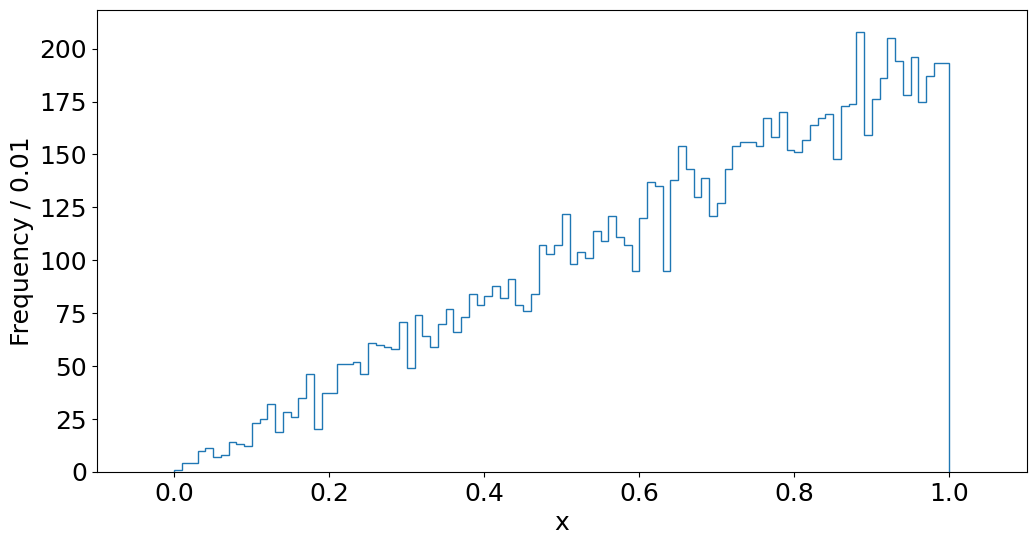

In [8]:
fig2, ax2 = plt.subplots(figsize=(12, 6))
ax2.hist(x_accepted, bins=N_bins, range=(xmin, xmax), histtype='step', label='histogram' )
ax2.set(xlabel="x", ylabel="Frequency / 0.01", xlim=(xmin-0.1, xmax+0.1));

And plot $g(x)$ on top of the figure (notice, no fit here!) along with the legend, figure text and finally saves the figure:

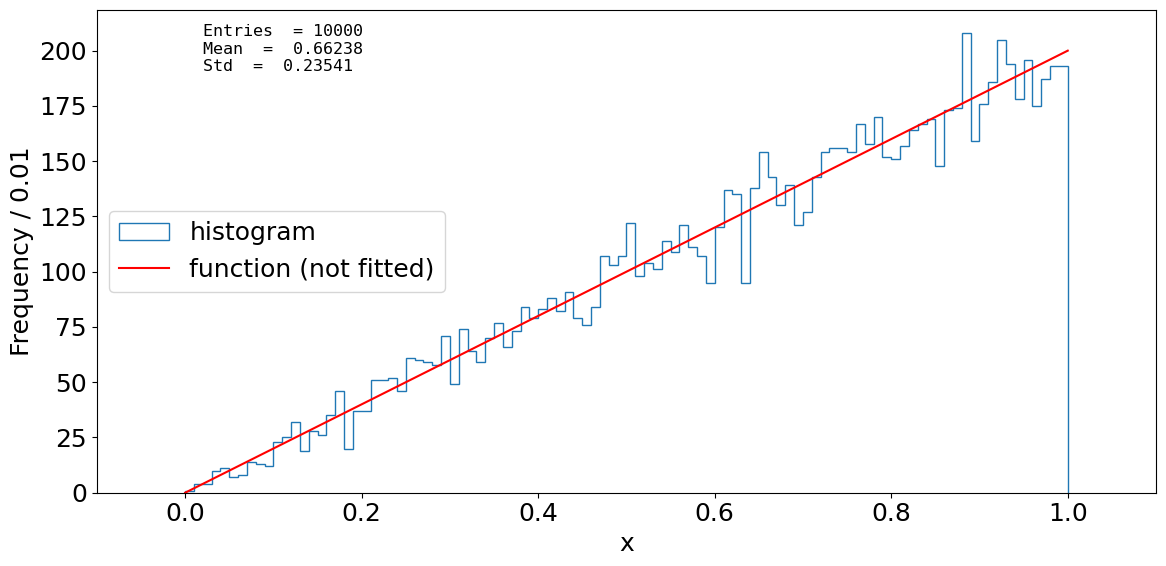

In [9]:
# Plot f(x)
x_axis2 = np.linspace(xmin, xmax, 1000)
y_axis2 = fx_2x(x_axis2)
ax2.plot(x_axis2, y_axis2, 'r-', label='function (not fitted)')

# Define the figure text
# Define figure text
plot_info = ['Entries  = ' + f"{len(x_transformation)}",
     'Mean  =  ' + f"{x_transformation.mean():3.5f}",
     'Std  =  '+ f"{x_transformation.std(ddof=1):3.5f}",
]

# Plot figure text
ax2.text(0.1, 0.97, "\n".join(plot_info), family='monospace', fontsize=12, verticalalignment='top',transform=ax2.transAxes)

# Add legend
ax2.legend(loc='best')
fig2.tight_layout()

# Save figure
if save_plots: 
    fig2.savefig("Hist_2x_AcceptRejectMethod.pdf", dpi=600)
    
# Show the figure
fig2

This exercise was simply to illustrate how to use the two methods. Next, you should try to apply the two methods yourself on slightly more complicated functions, which is what the following two exercises is about:
- TransformationAcceptReject_pol3.ipynb: Try the two methods on a third degree polynomial.
- TransformationAcceptReject_general.ipynb: Try the two methods on three different problems.

The learning points are in the next exercise (TransformationAcceptReject_pol3.ipynb)!

# Questions
1. How would you test, if the two histograms with numbers from transformation and accept/reject methods are statistically the same? There are many methods, but you should at least be able to think of one way.

_Example solution_: One way to compare them would be to compute the chi2 between the histograms, as we also covered in class. Here it is important to use the same binning and normalization between the the two distributions. By normalization we mean that the area under the histogram should be the same, ie there should be the same amount of datapoints in both histograms. When we compute the Chi2 we can evaluate the p-value which suggest that the two histograms are comparable. 

In [11]:
freq_transform, bins = np.histogram(x_transformation, bins=N_bins, range=(xmin, xmax))
freq_accepted, bins = np.histogram(x_accepted, bins=N_bins, range=(xmin, xmax))

chi2 = np.sum((freq_transform - freq_accepted)**2/(freq_transform + freq_accepted))

Ndof = len(freq_accepted) - 0 # We are not fitting anything, thus Ndof is equal to the number of bins
pval = stats.chi2.sf(chi2, Ndof)
print(pval)


0.16378396335925402
